# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print('Remember to enter your API Keys in the api_keys file')

Remember to enter your API Keys in the api_keys file


In [2]:
print(weather_api_key)

46d479ed96c458e8e6f198f0ee9873d7


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [4]:
print(cities)

['lebu', 'bluff', 'rikitea', 'jacksonville beach', 'tiksi', 'butaritari', 'hermanus', 'juneau', 'kruisfontein', 'oranjemund', 'nikolskoye', 'victoria', 'valparaiso', 'boa vista', 'amderma', 'marzuq', 'provideniya', 'mys shmidta', 'port alfred', 'mount isa', 'puerto gaitan', 'savonlinna', 'itoman', 'ushuaia', 'akola', 'monrovia', 'kodiak', 'cockburn harbour', 'torbay', 'marienburg', 'moussoro', 'perigueux', 'new norfolk', 'impfondo', 'buta', 'yellowknife', 'yarim', 'bonthe', 'dikson', 'hithadhoo', 'punta arenas', 'college', 'tuktoyaktuk', 'busselton', 'hobart', 'avarua', 'chuy', 'ballina', 'alofi', 'luderitz', 'port elizabeth', 'haapu', 'atuona', 'tuatapere', 'ugoofaaru', 'bredasdorp', 'komsomolskiy', 'cherskiy', 'broken hill', 'tubruq', 'labutta', 'oktyabrskiy', 'zhangjiakou', 'norman wells', 'coihaique', 'east london', 'sinkat', 'castro', 'ubinskoye', 'springbok', 'mataura', 'bolungarvik', 'cape town', 'pevek', 'listvyanka', 'kahului', 'kapaa', 'beloha', 'warwick', 'san cristobal', 'a

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Lists and counters
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : lebu
Processing Record 2 of Set 1 : bluff
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : jacksonville beach
Processing Record 5 of Set 1 : tiksi
Processing Record 6 of Set 1 : butaritari
Processing Record 7 of Set 1 : hermanus
Processing Record 8 of Set 1 : juneau
Processing Record 9 of Set 1 : kruisfontein
Processing Record 10 of Set 1 : oranjemund
Processing Record 11 of Set 1 : nikolskoye
Processing Record 12 of Set 1 : victoria
Processing Record 13 of Set 1 : valparaiso
Processing Record 14 of Set 1 : boa vista
City not found. Skipping...
Processing Record 15 of Set 1 : marzuq
Processing Record 16 of Set 1 : provideniya
City not found. Skipping...
Processing Record 17 of Set 1 : port alfred
Processing Record 18 of Set 1 : mount isa
Processing Record 19 of Set 1 : puerto gaitan
Processing Record 20 of Set 1 : savonlinna
Processing Record 21 of Set 1 : itoman
Processing Rec

Processing Record 34 of Set 4 : estelle
Processing Record 35 of Set 4 : yumbe
Processing Record 36 of Set 4 : kavaratti
Processing Record 37 of Set 4 : bubaque
Processing Record 38 of Set 4 : ancud
Processing Record 39 of Set 4 : vyazemskiy
Processing Record 40 of Set 4 : nayoro
Processing Record 41 of Set 4 : lagoa
Processing Record 42 of Set 4 : lazarev
City not found. Skipping...
Processing Record 43 of Set 4 : sola
Processing Record 44 of Set 4 : reporoa
Processing Record 45 of Set 4 : pathanamthitta
Processing Record 46 of Set 4 : iqaluit
Processing Record 47 of Set 4 : martapura
Processing Record 48 of Set 4 : georgetown
Processing Record 49 of Set 4 : olenino
Processing Record 50 of Set 4 : bethel
Processing Record 0 of Set 5 : leningradskiy
Processing Record 1 of Set 5 : beba
Processing Record 2 of Set 5 : pagudpud
Processing Record 3 of Set 5 : paredon
Processing Record 4 of Set 5 : adre
Processing Record 5 of Set 5 : longyearbyen
City not found. Skipping...
City not found. Sk

Processing Record 21 of Set 8 : chifeng
Processing Record 22 of Set 8 : vandavasi
Processing Record 23 of Set 8 : sitka
Processing Record 24 of Set 8 : port hawkesbury
City not found. Skipping...
Processing Record 25 of Set 8 : kirakira
Processing Record 26 of Set 8 : mukhen
Processing Record 27 of Set 8 : springfield
Processing Record 28 of Set 8 : guadalupe victoria
Processing Record 29 of Set 8 : mehamn
Processing Record 30 of Set 8 : bacolod
Processing Record 31 of Set 8 : hovd
Processing Record 32 of Set 8 : aklavik
Processing Record 33 of Set 8 : akdepe
Processing Record 34 of Set 8 : hobyo
Processing Record 35 of Set 8 : zhezkazgan
Processing Record 36 of Set 8 : lac du bonnet
City not found. Skipping...
Processing Record 37 of Set 8 : amalapuram
Processing Record 38 of Set 8 : lukaya
Processing Record 39 of Set 8 : erenhot
Processing Record 40 of Set 8 : te anau
Processing Record 41 of Set 8 : milkovo
Processing Record 42 of Set 8 : nagorsk
City not found. Skipping...
Processin

In [6]:
#Create a dataframe using information from data retrieval
weather_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    })

In [7]:
weather_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,55.80,87,0,6.08,CL,1615682403
1,Bluff,-46.6000,168.3333,73.00,44,62,15.01,NZ,1615682667
2,Rikitea,-23.1203,-134.9692,80.51,73,37,8.70,PF,1615682667
3,Jacksonville Beach,30.2947,-81.3931,71.60,60,1,10.36,US,1615682668
4,Tiksi,71.6872,128.8694,-0.08,88,100,6.13,RU,1615682668


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Export the City_Data into a csv
weather_df.to_csv("output_data/cities.csv")
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,55.80,87,0,6.08,CL,1615682403
1,Bluff,-46.6000,168.3333,73.00,44,62,15.01,NZ,1615682667
2,Rikitea,-23.1203,-134.9692,80.51,73,37,8.70,PF,1615682667
3,Jacksonville Beach,30.2947,-81.3931,71.60,60,1,10.36,US,1615682668
4,Tiksi,71.6872,128.8694,-0.08,88,100,6.13,RU,1615682668
...,...,...,...,...,...,...,...,...,...
557,Newport,51.5877,-2.9984,46.00,75,43,4.00,GB,1615682681
558,Kirovskiy,45.0917,133.5136,32.14,86,2,2.53,RU,1615682840
559,Ørnes,66.8689,13.7078,32.00,80,75,14.97,NO,1615682840
560,Oriximiná,-1.7656,-55.8661,75.60,91,100,2.77,BR,1615682841


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#check if there are any cities with >100% humidity
test_stats = weather_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!")
test_stats

# weather_df["humidity"].value_counts()

By inspection, the maximum humidity value is 100%, so there are no values greater than 100% in our data!


count    562.000000
mean      71.839858
std       20.056497
min        8.000000
25%       61.000000
50%       76.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

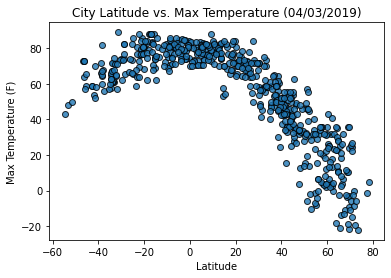

In [13]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/03/2019)")
plt.savefig("output_data/Max_temp.png")

This plot is showing the decrease in temperature as your move further North per the Latitude and therefore further away from the equator.  This also shows that the Northern Hemisphere is in fact much colder than the Southern Hemisphere and contains more cities that are in colder areas.

## Latitude vs. Humidity Plot

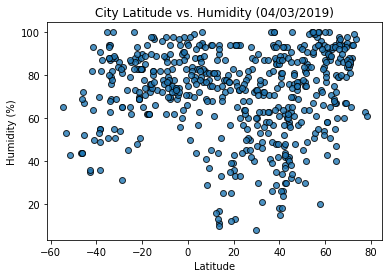

In [14]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/03/2019)")
plt.savefig("output_data/Humidity.png")

This plot is showing that the higher humidity is actually found at 0 degrees (the equator) or north of 0 degrees or the Northern Hemisphere. So there are more cities in areas of high humidity close to the equator and the Northern Hemisphere.

## Latitude vs. Cloudiness Plot

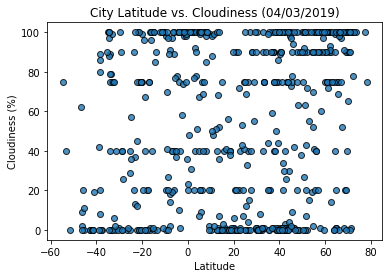

In [15]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/03/2019)")
plt.savefig("output_data/Cloudiness.png")

This plot is showing the location of a city in relation to how cloudy they are.  From this plot you can see that there are multiple cities which have zero clouds and actually 100% clouds.  It also shows that the least amount of cloudy cities are near the equator and as you more either north or south on the latitudes there are more cities that are cloudy.

## Latitude vs. Wind Speed Plot

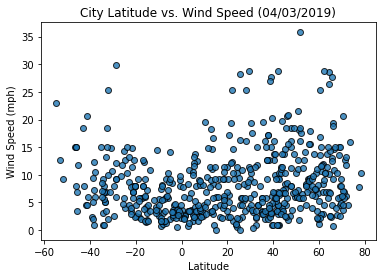

In [16]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/03/2019)")
plt.savefig("output_data/Wind_Speed.png")

This plot is showing the Latitude location versus the wind speed in that location.  From the plot we can see that the wind speed in many cities is below 10 mph. There are several cities close to zero wind speeds and very few cities with higher than 20 mph wind speeds.

## Linear Regression

In [17]:
 # Create Northern and Southern Hemisphere DataFrames
L=0
Northern = weather_df.query(f"Lat >= {L}")
Southern = weather_df.query(f"Lat <= {L}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.8015244690416797


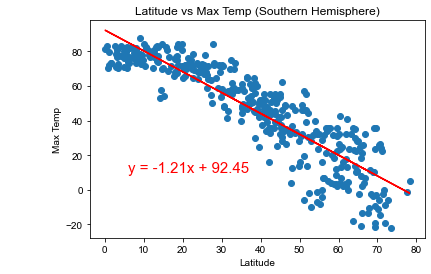

In [18]:
x_values=Northern['Lat']
y_values=Northern['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Print on graph
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-25,11),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value

print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot
plt.savefig("output_data/NH_Max_Temp_Lat_Regression.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.425509997152671


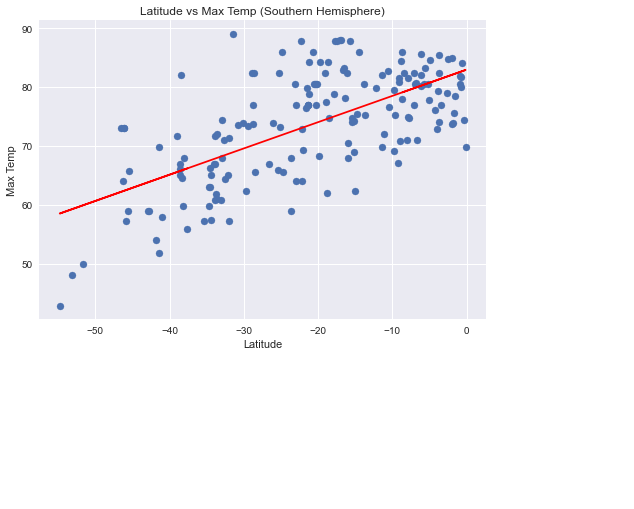

In [19]:
x_values=Southern['Lat']
y_values=Southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.savefig("output_data/SH_Max_Temp_Lat_Regression.png")
plt.show()


These two graphs show how the temperature decreases in the Northern Hemisphere and then how the temperature increases as you move closer to 0 degrees or the equator.  There is a negative correlation with the Northern Hemisphere plot and a positive correlation with the Southern Hemisphere plot.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.030196286758831764


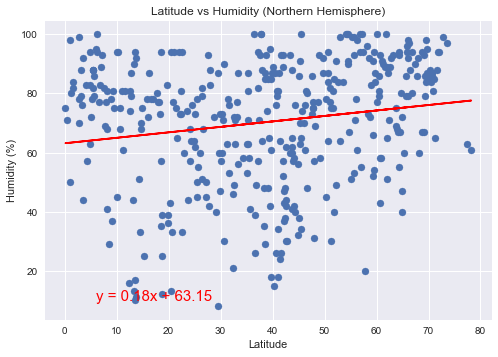

In [20]:
x_values=Northern['Lat']
y_values=Northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.savefig("output_data/NH_Humidity_Lat_Regression.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.1312664303447939


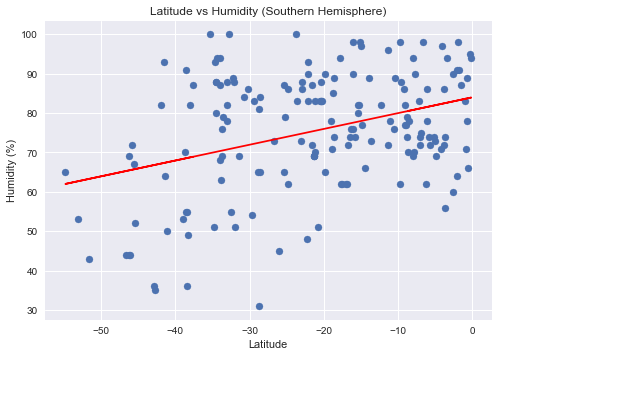

In [21]:
x_values=Southern['Lat']
y_values=Southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Southern Hemisphere)')
plt.style.use('seaborn')


# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot
plt.savefig("output_data/SH_Humidity_Lat_Regression.png")
plt.show()


These two plots show that there is not a significant correlation with the humidity percentage in the Northern and Southern hemispheres. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.04260930240600017


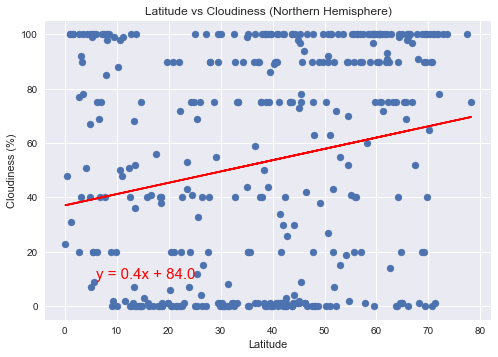

In [22]:
x_values=Northern['Lat']
y_values=Northern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot
plt.savefig("output_data/NH_Cloudiness_Lat_Regression.png")
plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.09920959636055476


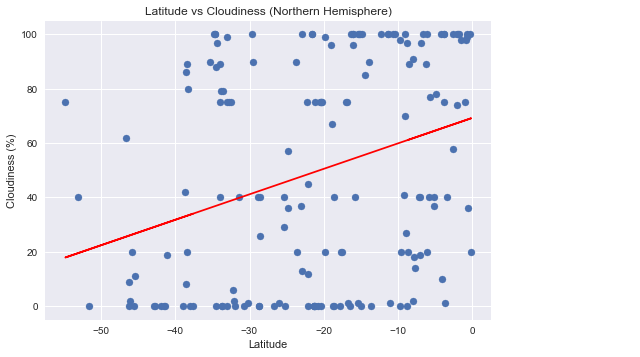

In [23]:
x_values=Southern['Lat']
y_values=Southern['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot
plt.savefig("output_data/SH_Cloudiness_Lat_Regression.png")
plt.show()


Since there are spots all over each of these two plots, there is no significant correlation between the latitude and the cloudiness in the Northern or Southern Hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.041212012603472646


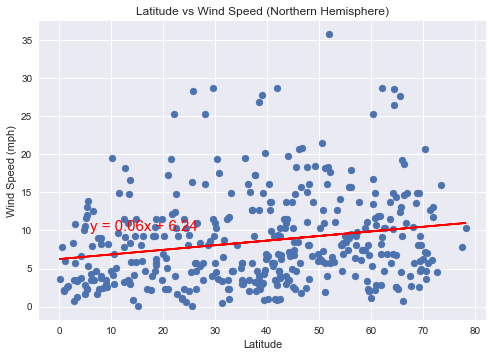

In [24]:
x_values=Northern['Lat']
y_values=Northern['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")

# Show plot

plt.savefig("output_data/NH_Wind_Speed_Lat_Regression.png")
plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The coefficient of determination(R^2) is: 0.1588791985961642


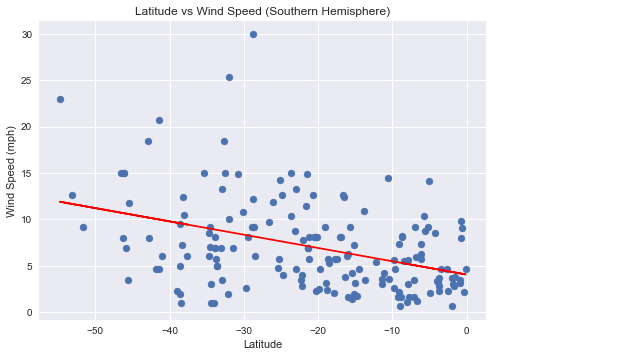

In [25]:
x_values=Southern['Lat']
y_values=Southern['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')
plt.style.use('seaborn')

# Print r square value
print(f"The coefficient of determination(R^2) is: {rvalue**2}")


# Show plot

plt.savefig("output_data/SH_Wind_Speed_Lat_Regression.png")

plt.show()



These two plots show that there really is no correlation between the latitude location in the Northern or Southern Hemisphere and wind speed.